# EDA
В датасете собраны данные с двух отелей: курортного и городского

Данные содержат *«бронирования, которые должны быть получены в период с 1 июля 2015 года по 31 августа 2017 года».*
**Примечание**. Для большинства вопросов я буду использовать только те бронирования, которые не были отменены, чтобы получить актуальные номера гостей.  Как вы увидите, это довольно большая разница.

Вопросы на которые нужно ответить исходя из данных:
- Откуда приходят гости?
- Сколько гости платят за номер в сутки?
- Как меняется цена за ночь в течение года?
- Какой самый загруженный месяц?
- Как долго люди остаются в отелях?
- Сколько бронирований было отменено?
- В каком месяце больше всего бронирований?


# Imports

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [128]:
df = pd.read_csv('./dataset/hotel_bookings.csv')
df_is_not_canceled = df.loc[df["is_canceled"] == 0]
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [74]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [75]:
df.shape

(119390, 32)

# Откуда приходят гости?

In [76]:
data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
data['names'] = data.index
total = data['country'].sum()
data['values'] = round(data['country'] / total * 100, 2)

plot = px.pie(data,
    title='Страны посетителей отелей',
    values='values',
    names='names',
    template="seaborn"
)

plot.update_traces(textposition="inside", textinfo="value+percent+label")
plot.show()

In [77]:
guest_map = px.choropleth(data,
                    locations=data['names'],
                    color=data["values"],
                    hover_name=data['names'],
                    color_continuous_scale='magma',
                    title="Страны посетителей отелей")
guest_map.show()

# Сколько гости платят за номер в сутки?
Предположим что цены указаны в Еврах. В отелях платными постояльцаи считаются дети и взрослые, младенцы бесплатные

In [131]:
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [132]:
print(f'Медиана стоимость одной ночи в отеле составляет:\n Курортный отель: {round(rh.adr.median(), 2)}\n Городской отель: {round(ch.adr.median(), 2)}')
print(f'Средняя стоимость одной ночи в отеле составляет:\n Курортный отель: {round(rh.adr.mean(), 2)}\n Городской отель: {round(ch.adr.mean(), 2)}')

Медиана стоимость одной ночи в отеле составляет:
 Курортный отель: 72.0
 Городской отель: 99.9
Средняя стоимость одной ночи в отеле составляет:
 Курортный отель: 90.79
 Городской отель: 105.75


In [129]:
px.box(data_frame = df_is_not_canceled, x='reserved_room_type', y='adr', color='hotel', template='plotly')

# Как меняется цена за ночь в течение года?

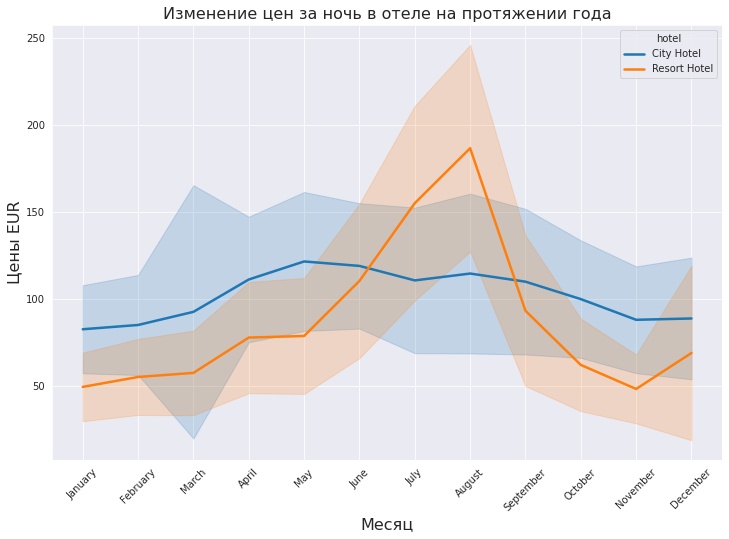

In [143]:
room_prices_mothly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=months, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly,
             hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Изменение цен за ночь в отеле на протяжении года", fontsize=16)
plt.xlabel("Месяц", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Цены EUR", fontsize=16)
plt.show()

# Какой самый загруженный месяц?

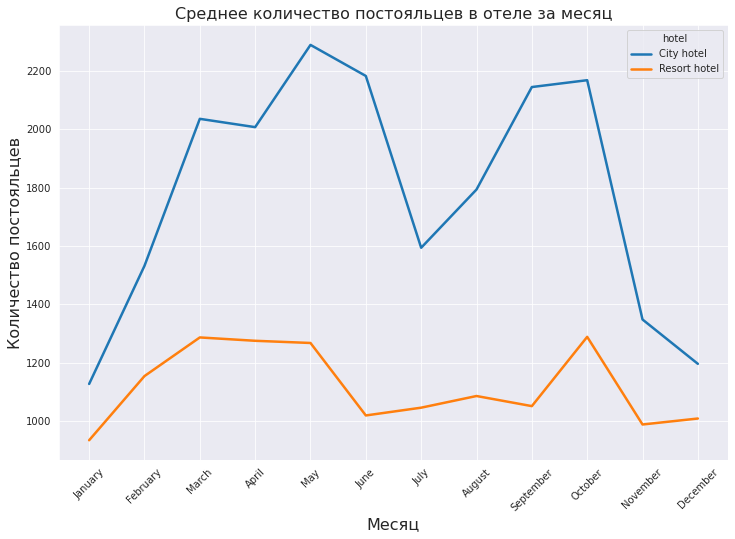

In [171]:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                                  "hotel": "Resort hotel",
                                  "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                                "hotel": "City hotel",
                                "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

ordered_months = ["January", "February", "March", "April", "May", "June",
                  "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data,
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Среднее количество постояльцев в отеле за месяц", fontsize=16)
plt.xlabel("Месяц", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Количество постояльцев", fontsize=16)
plt.show()

Весной и осенью в городских гостиницах бывает больше гостей, когда и цены самые высокие.
 В июле и августе посетителей меньше, хотя и цены ниже.

 Количество гостей в курортном отеле немного снижается с июня по сентябрь, когда цены также самые высокие.
 В обоих отелях меньше всего гостей зимой.

/tmp/ipykernel_22739/738249827.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_22739/738249827.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



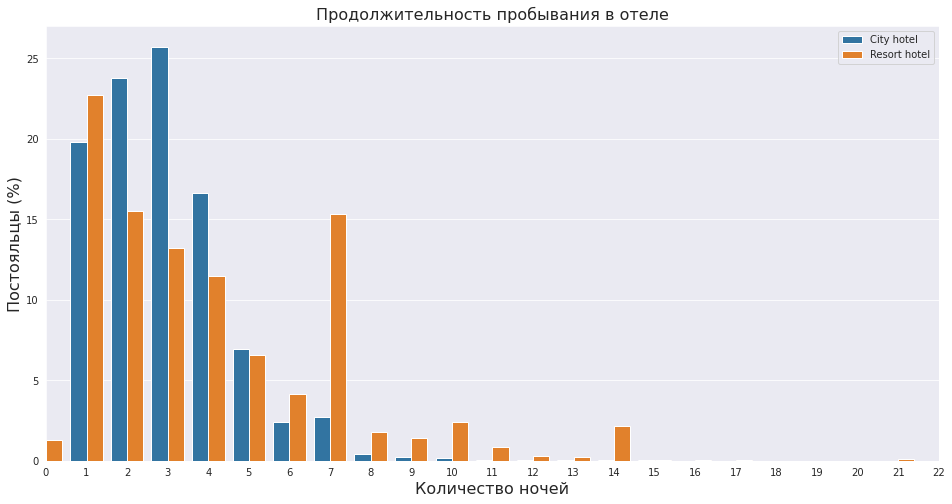

In [186]:
rh['total_nights'] = rh['stays_in_weekend_nights'] + rh['stays_in_week_nights']
ch['total_nights'] = ch['stays_in_weekend_nights'] + ch['stays_in_week_nights']

num_nights_resort = list(rh["total_nights"].value_counts().index)
num_bookings_resort = list(rh["total_nights"].value_counts())
rel_bookings_resort = rh["total_nights"].value_counts() / sum(num_bookings_resort) * 100

num_nights_city = list(ch["total_nights"].value_counts().index)
num_bookings_city = list(ch["total_nights"].value_counts())
rel_bookings_city = ch["total_nights"].value_counts() / sum(num_bookings_city) * 100

resort_nights = pd.DataFrame({'num_nights': num_nights_resort,
                              'hotel': 'Resort hotel',
                              'rel_num_bookings': rel_bookings_resort})

city_nights = pd.DataFrame({'num_nights': num_nights_city,
                            'hotel': 'City hotel',
                            'rel_num_bookings': rel_bookings_city})

nights_data = pd.concat([resort_nights, city_nights], ignore_index=True)

plt.figure(figsize=(16, 8))
sns.barplot(x="num_nights", y="rel_num_bookings", hue="hotel", data=nights_data,
            hue_order=["City hotel", "Resort hotel"])
plt.title("Продолжительность пробывания в отеле", fontsize=16)
plt.xlabel("Количество ночей", fontsize=16)
plt.ylabel("Постояльцы (%)", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

In [190]:
avg_nights_resort = sum(list((resort_nights["num_nights"] * (resort_nights["rel_num_bookings"]/100)).values))
avg_nights_city = sum(list((city_nights["num_nights"] * (city_nights["rel_num_bookings"]/100)).values))
print(f"В среденм, постояльцы городского отеля останавливаются в нём на {avg_nights_city:.2f} ночи, и {city_nights['num_nights'].max()} максимально.")
print(f"В среденм, постояльцы курортного отеля останавливаются в нём на {avg_nights_resort:.2f} ночи, и {resort_nights['num_nights'].max()} максимально.")

В среденм, постояльцы городского отеля останавливаются в нём на 2.92 ночи, и 57 максимально.
В среденм, постояльцы курортного отеля останавливаются в нём на 4.14 ночи, и 69 максимально.


# Сколько бронирований было отменено?